In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv("bank-full.csv", delimiter= ";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df['pdays'].nunique()

559

In [7]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [8]:
conditions =[
    (df['pdays'] == -1),
    (df['pdays'] > -1) & (df['pdays'] <= 7),
    (df['pdays'] > 7) & (df['pdays'] <= 30),
    (df['pdays'] > 30) & (df['pdays'] <= 365),
    (df['pdays'] > 365),
]

In [9]:
values = [
    'Never Contacted Before',
    '1 Week or less',
    '1 Week to 1 Month',
    '1 Month to 1 Year',
    'More than a Year'
]

In [10]:
df['pdays_2'] = np.select(conditions, values)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Never Contacted Before
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Never Contacted Before
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Never Contacted Before
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Never Contacted Before
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Never Contacted Before


In [12]:
df.pdays_2.value_counts()

Never Contacted Before    36954
1 Month to 1 Year          7426
More than a Year            643
1 Week to 1 Month           105
1 Week or less               83
Name: pdays_2, dtype: int64

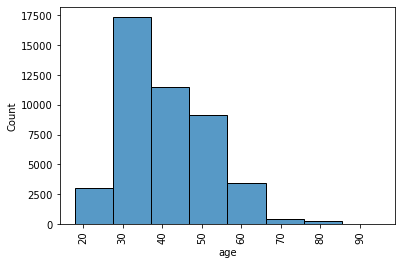

In [13]:
sns.histplot(x = df['age'], bins = 8)
plt.xticks(rotation = 90)
plt.show()

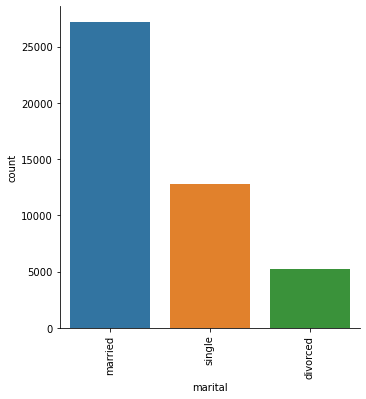

In [14]:
sns.catplot(data = df, x = 'marital', kind = 'count', order = df['marital'].value_counts().keys())
plt.xticks(rotation = 90)
plt.show()

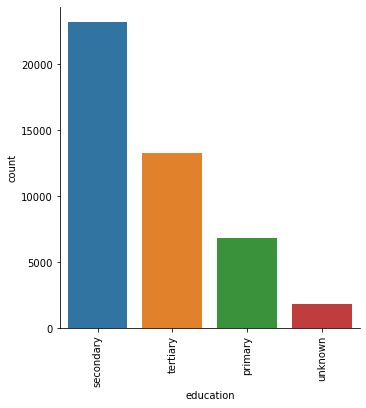

In [15]:
sns.catplot(data = df, x = 'education', kind = 'count', order = df['education'].value_counts().keys())
plt.xticks(rotation = 90)
plt.show()

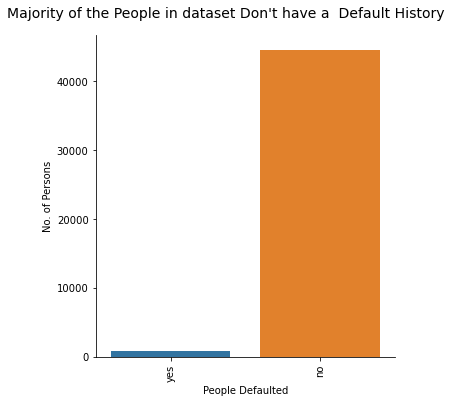

In [16]:
g = sns.catplot(data = df, x = 'default', kind = 'count', order = (['yes', 'no']))
g.fig.suptitle("Majority of the People in dataset Don't have a  Default History", ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "People Defaulted", ylabel = 'No. of Persons')
plt.xticks(rotation = 90)
plt.show()

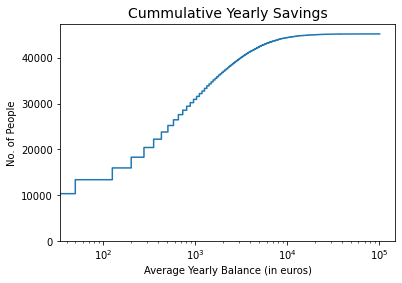

In [17]:
g = sns.histplot(data = df, x = 'balance', element = 'step', cumulative = True, fill = False)
g.set_title('Cummulative Yearly Savings', fontsize = 14)
g.set(xlabel = "Average Yearly Balance (in euros)", ylabel = "No. of People")
plt.xscale('log')

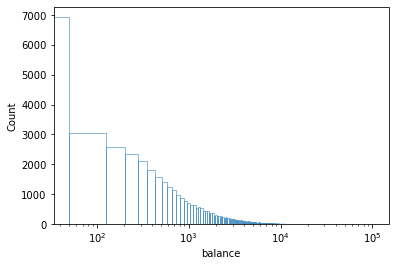

In [18]:
g = sns.histplot(data = df, x = 'balance', element = 'bars', fill = False)
plt.xscale('log')

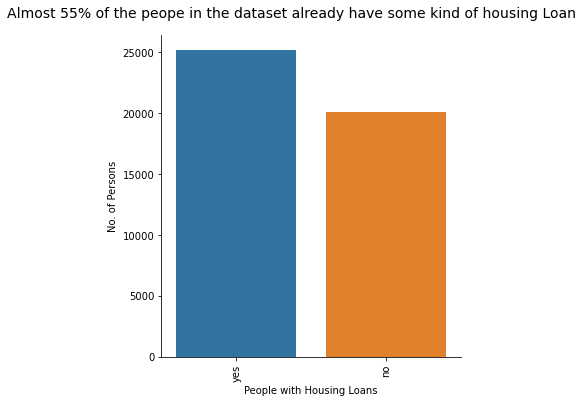

In [19]:
g = sns.catplot(data = df, x = 'housing', kind = 'count', order = (['yes', 'no']))
g.fig.suptitle("Almost 55% of the peope in the dataset already have some kind of housing Loan", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "People with Housing Loans", ylabel = 'No. of Persons')
plt.xticks(rotation = 90)
plt.show()

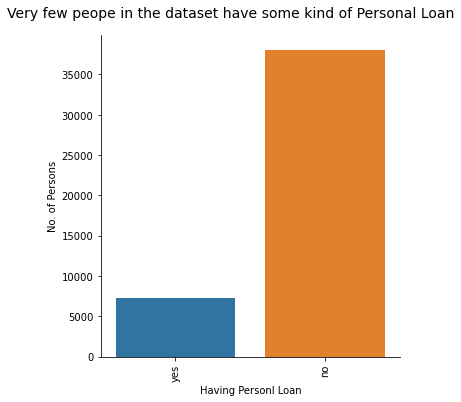

In [20]:
g = sns.catplot(data = df, x = 'loan', kind = 'count', order = (['yes', 'no']))
g.fig.suptitle("Very few peope in the dataset have some kind of Personal Loan", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "Having Personl Loan", ylabel = 'No. of Persons')
plt.xticks(rotation = 90)
plt.show()

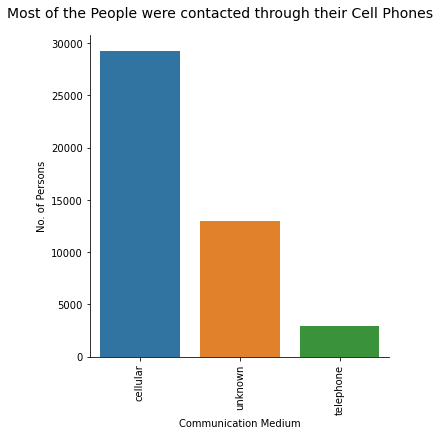

In [21]:
g = sns.catplot(data = df, x = 'contact', kind = 'count', order = df['contact'].value_counts().keys())
g.fig.suptitle("Most of the People were contacted through their Cell Phones", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "Communication Medium", ylabel = 'No. of Persons')
plt.xticks(rotation = 90)
plt.show()

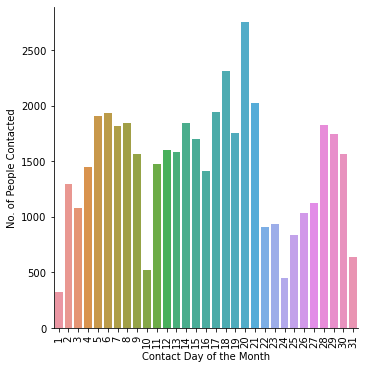

In [22]:
g = sns.catplot(data = df, x = 'day', kind = 'count')
g.fig.suptitle("", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "Contact Day of the Month", ylabel = 'No. of People Contacted')
plt.xticks(rotation = 90)
plt.show()

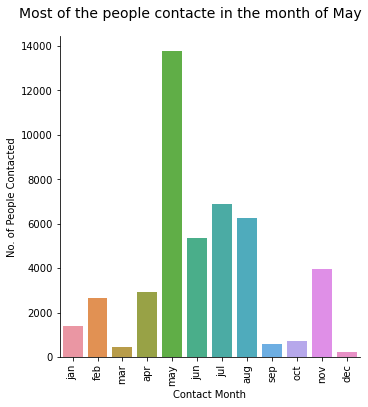

In [23]:
g = sns.catplot(data = df, x = 'month', kind = 'count', order = (['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec']))
g.fig.suptitle("Most of the people contacte in the month of May", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "Contact Month", ylabel = 'No. of People Contacted')
plt.xticks(rotation = 90)
plt.show()

[Text(0.5, 0, 'Avg. Call Duration (in seconds)'),
 Text(0, 0.5, 'No. of Calls'),
 (0.0, 2000.0)]

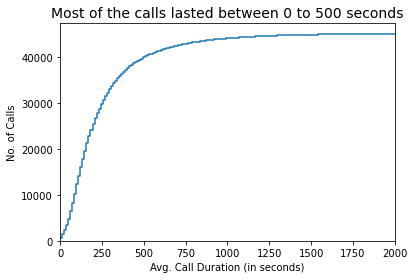

In [24]:
g = sns.histplot(data = df, x = 'duration', element = 'step', cumulative = True, fill = False)
g.set_title('Most of the calls lasted between 0 to 500 seconds', fontsize = 14)
g.set(xlabel = "Avg. Call Duration (in seconds)", ylabel = "No. of Calls", xlim = (0, 2000))

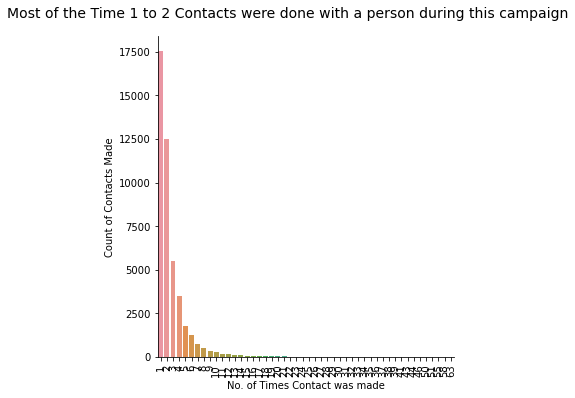

In [30]:
g = sns.catplot(data = df, x = 'campaign', kind = 'count')
g.fig.suptitle("Most of the Time 1 to 2 Contacts were done with a person during this campaign", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "No. of Times Contact was made", ylabel = 'Count of Contacts Made')
plt.xticks(rotation = 90)
plt.show()

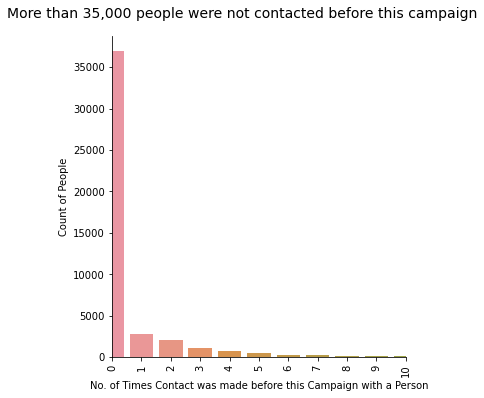

In [31]:
g = sns.catplot(data = df, x = 'previous', kind = 'count')
g.fig.suptitle("More than 35,000 people were not contacted before this campaign", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "No. of Times Contact was made before this Campaign with a Person", ylabel = 'Count of People', xlim = (0, 10))
plt.xticks(rotation = 90)
plt.show()

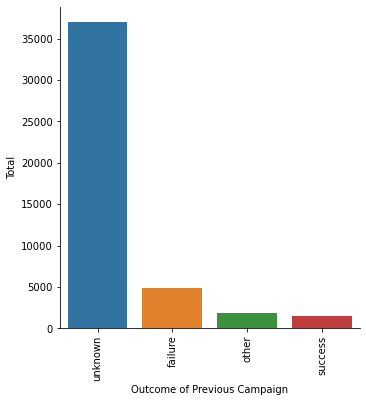

In [32]:
g = sns.catplot(data = df, x = 'poutcome', kind = 'count', order = df['poutcome'].value_counts().keys())
g.fig.suptitle("", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "Outcome of Previous Campaign", ylabel = 'Total')
plt.xticks(rotation = 90)
plt.show()

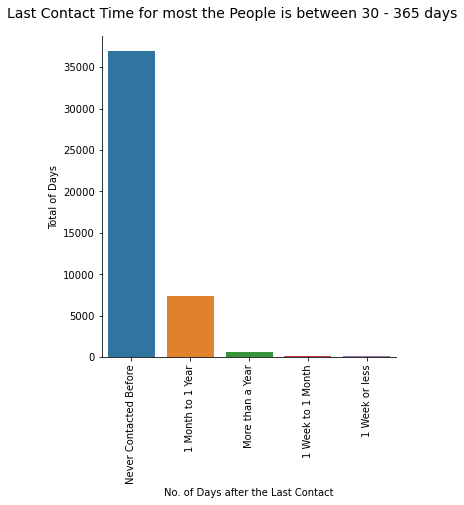

In [33]:
g = sns.catplot(data = df, x = 'pdays_2', kind = 'count', order = df['pdays_2'].value_counts().keys())
g.fig.suptitle("Last Contact Time for most the People is between 30 - 365 days", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "No. of Days after the Last Contact", ylabel = 'Total of Days')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
g = sns.catplot(data = df, x = 'y', kind = 'count', order = (['yes', 'no']))
g.fig.suptitle("Out of 45,000 people in the dataset, almost 5,000 subscribed to the Term Deposit", 
               ha = 'center', y = 1.05, fontsize = 14)
g.set(xlabel = "People Subscribed to Term Deposit", ylabel = 'No. of Persons')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.info()

In [34]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

<AxesSubplot:>

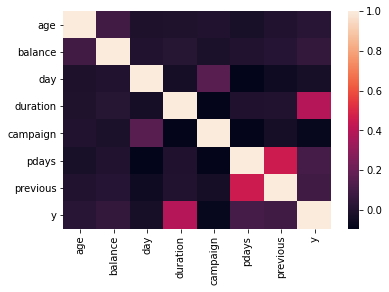

In [50]:
sns.heatmap(df.corr())

In [ ]:
byJob = df.groupby('job', as_index = False).y.mean().sort_values(by = 'y', ascending = False)

ax = sns.barplot(x = 'job', y = 'y', data = byJob)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

ax.set_title("Studetns comprise more than 25% of the total people who subscribed to the account", fontsize = 16, y = 1.05)
ax.set_xlabel('Job Categories')
plt.xticks(rotation = 75)
ax.set_ylabel("Percent subscribed")

In [ ]:
df['ageGroup'] = pd.cut(df.age, bins = [0, 20, 30, 40, 50, 60, 70, np.inf], 
                        labels = ['0 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70+'])
df[['age', 'ageGroup']].head()

In [ ]:
df.columns

In [ ]:
df.rename(columns ={'ageGroup': 'AgeCategory'}, inplace = True)
df.columns

In [ ]:
byAge = df.groupby('AgeCategory', as_index= False).y.mean()
byAge.head()

sns.set_style('whitegrid')

ax = sns.barplot(x = 'AgeCategory', y = 'y', data = byAge)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

ax.set_xlabel("Age Group", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

In [ ]:
byMarital = df.groupby('marital', as_index= False).y.mean().sort_values(by = 'y', ascending = False)

ax = sns.barplot(x = 'marital', y = 'y', data = byMarital)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("Almost 15% percent of the people who were contacted and subscribed are Singles", fontsize = 16, y = 1.05)
ax.set_xlabel("Marital Status", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

In [ ]:
byEducation = df.groupby('education', as_index= False).y.mean()

ax = sns.barplot(x = 'education', y = 'y', data = byEducation)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Education Level", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

Text(0, 0.5, 'Percentage Subscribed')

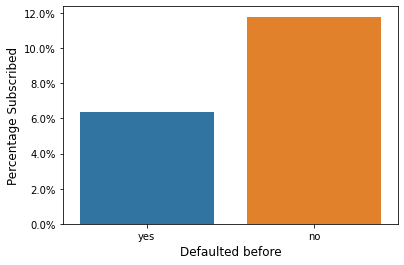

In [35]:
byDefault = df.groupby('default', as_index= False).y.mean()

ax = sns.barplot(x = 'default', y = 'y', data = byDefault, order= ('yes', 'no'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Defaulted before", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

Text(0, 0.5, 'Balnance')

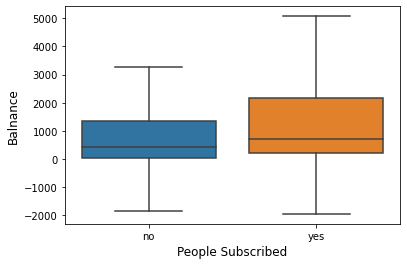

In [27]:
ax = sns.boxplot(x = 'y', y = 'balance', data = df, showfliers = False)
# ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("People Subscribed", fontsize = 12)
ax.set_ylabel("Balnance", fontsize = 12)

Text(0, 0.5, 'Percentage Subscribed')

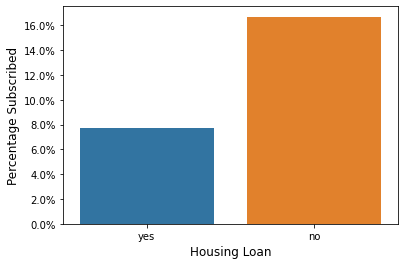

In [36]:
byHousing = df.groupby('housing', as_index= False).y.mean()

ax = sns.barplot(x = 'housing', y = 'y', data = byHousing, order = ('yes', 'no'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Housing Loan", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)


Text(0, 0.5, 'Percentage Subscribed')

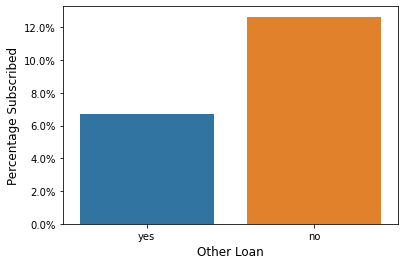

In [37]:
byLoan = df.groupby('loan', as_index= False).y.mean()

ax = sns.barplot(x = 'loan', y = 'y', data = byLoan, order = ('yes', 'no'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Other Loan", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

Text(0, 0.5, 'Percentage Subscribed')

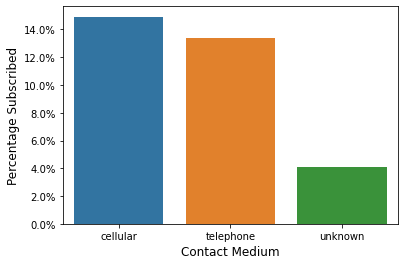

In [38]:
byContact = df.groupby('contact', as_index= False).y.mean()

ax = sns.barplot(x = 'contact', y = 'y', data = byContact)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Contact Medium", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

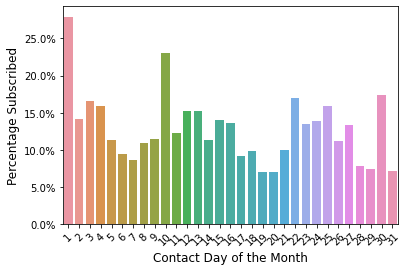

In [44]:
byDay = df.groupby('day', as_index= False).y.mean()

ax = sns.barplot(x = 'day', y = 'y', data = byDay)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Contact Day of the Month", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)
plt.xticks(rotation  = 45)

Text(0, 0.5, 'Percentage Subscribed')

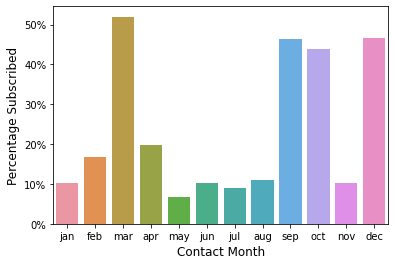

In [40]:
byMonth = df.groupby('month', as_index= False).y.mean()

ax = sns.barplot(x = 'month', y = 'y', data = byMonth, 
                 order = ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Contact Month", fontsize = 12)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

Text(0, 0.5, 'Last Call Duration (in seconds)')

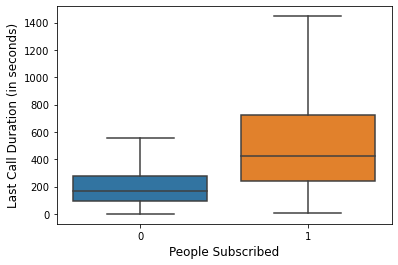

In [45]:
ax = sns.boxplot(x = 'y', y = 'duration', data = df, showfliers = False)
# ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("People Subscribed", fontsize = 12)
ax.set_ylabel("Last Call Duration (in seconds)", fontsize = 12)

Text(0, 0.5, 'Number of Contacts Made During This Campaign')

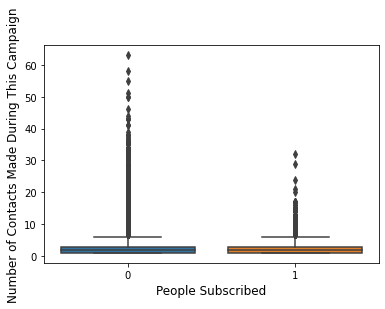

In [46]:
ax = sns.boxplot(x = 'y', y = 'campaign', data = df)
# ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("People Subscribed", fontsize = 12)
ax.set_ylabel("Number of Contacts Made During This Campaign", fontsize = 12)

Text(0, 0.5, 'Percentage Subscribed')

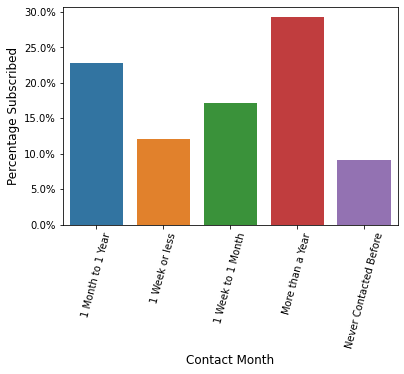

In [47]:
byPdays = df.groupby('pdays_2', as_index= False).y.mean()

ax = sns.barplot(x = 'pdays_2', y = 'y', data = byPdays)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Contact Month", fontsize = 12)
plt.xticks(rotation = 75)
ax.set_ylabel("Percentage Subscribed", fontsize = 12)

Text(0, 0.5, 'No. of Days since Last Contact Made')

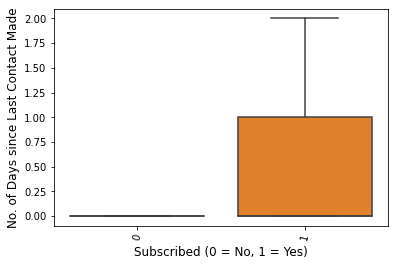

In [49]:
# byPrevious = df.groupby('previous', as_index= False).y.mean()

ax = sns.boxplot(y = 'previous', x = 'y', data = df, showfliers = False)
#ax.yaxis.set_major_formatter(PercentFormatter(1.0))

#ax.set_title("------Title Here--------------", fontsize = 16, y = 1.05)
ax.set_xlabel("Subscribed (0 = No, 1 = Yes)", fontsize = 12)
plt.xticks(rotation = 75)
ax.set_ylabel("No. of Days since Last Contact Made", fontsize = 12)